In [2]:
pip install pandas-datareader --upgrade


In [15]:
pip install yfinance


In [42]:
import pandas_datareader.data as web
import datetime
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [43]:
# Define the symbols and start date
symbols = ['AAPL', 'GOOG', 'TSLA']
start_date = '2020-01-01'

# Create an empty DataFrame to store the data
s = pd.DataFrame()

# Loop through each symbol and fetch the data
for symbol in symbols:
    df = yf.download(symbol, start=start_date)
    s[symbol] = df['Adj Close']

# Print the first few rows of the combined DataFrame
print(s.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                 AAPL       GOOG       TSLA
Date                                       
2020-01-02  73.249023  68.368500  28.684000
2020-01-03  72.536903  68.032997  29.534000
2020-01-06  73.114883  69.710503  30.102667
2020-01-07  72.771027  69.667000  31.270666
2020-01-08  73.941635  70.216003  32.809334


#1.Find out if a heirarchical indexing (MultiIndex) is being used in this data.

In [44]:
# Check if the index is a MultiIndex
is_multiindex = isinstance(s.index, pd.MultiIndex)

if is_multiindex:
    print("The DataFrame uses hierarchical indexing (MultiIndex).")
else:
    print("The DataFrame does not use hierarchical indexing (MultiIndex).")


The DataFrame does not use hierarchical indexing (MultiIndex).


# 2. Access and plot the closing price of AAPL on all days in the data.

[*********************100%%**********************]  1 of 1 completed


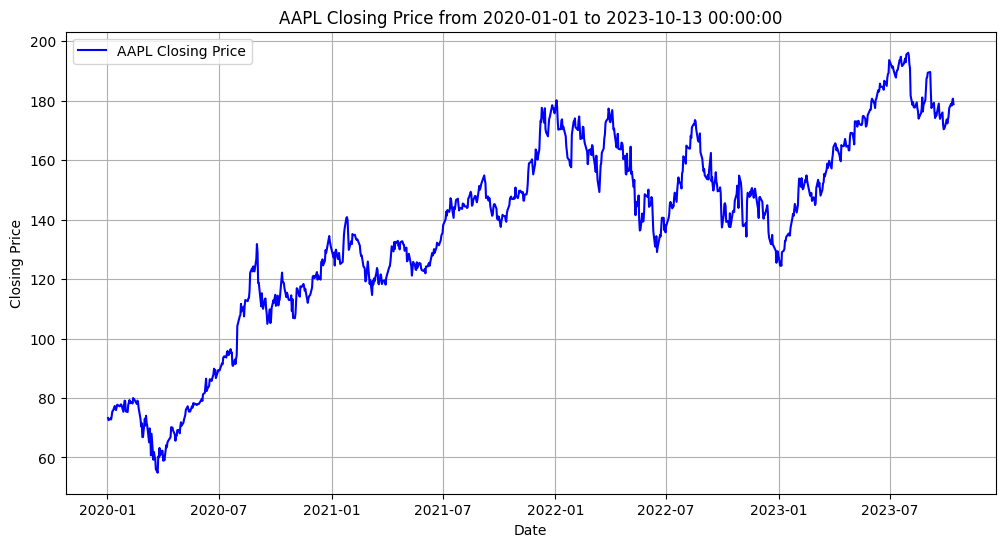

In [45]:
# Define the symbol and start date
symbol = 'AAPL'
start_date = '2020-01-01'

# Fetch the data for AAPL
df = yf.download(symbol, start=start_date)

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label=f'{symbol} Closing Price', color='blue')
plt.title(f'{symbol} Closing Price from {start_date} to {df.index[-1]}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


# 3. Print the closing price of all three stocks yesterday.

In [38]:
# Define the symbols
symbols = ['AAPL', 'GOOG', 'TSLA']

# Calculate the date for yesterday
yesterday = datetime.now() - timedelta(1)

# Create an empty DataFrame to store the closing prices
closing_prices = pd.DataFrame()

# Loop through each symbol and fetch the closing price for yesterday
for symbol in symbols:
    df = yf.download(symbol, start=yesterday, end=yesterday)
    closing_prices[symbol] = df['Adj Close']

# Print the closing prices for yesterday
print("Closing Prices for Yesterday:")
print(closing_prices)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Closing Prices for Yesterday:
                  AAPL        GOOG        TSLA
Date                                          
2023-10-13  178.850006  138.580002  251.119995


# 4. Extract a smaller data frame with no MultiIndex containing only TSLA data.

In [39]:
# Define the symbol and start date
symbol = 'TSLA'
start_date = '2020-01-01'

# Fetch the data for TSLA
tsla_data = yf.download(symbol, start=start_date)

# Print the TSLA data
print(tsla_data)


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   28.299999   28.713333   28.114000   28.684000   28.684000   
2020-01-03   29.366667   30.266666   29.128000   29.534000   29.534000   
2020-01-06   29.364668   30.104000   29.333332   30.102667   30.102667   
2020-01-07   30.760000   31.441999   30.224001   31.270666   31.270666   
2020-01-08   31.580000   33.232666   31.215334   32.809334   32.809334   
...                ...         ...         ...         ...         ...   
2023-10-09  255.309998  261.359985  252.050003  259.670013  259.670013   
2023-10-10  257.750000  268.940002  257.649994  263.619995  263.619995   
2023-10-11  266.200012  268.600006  260.899994  262.989990  262.989990   
2023-10-12  262.920013  265.410004  256.630005  258.869995  258.869995   
2023-10-13  258.899994  259.600006  250.220